1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH

1.1 Biến đổi cường độ ảnh (Image inverse transformation)


[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


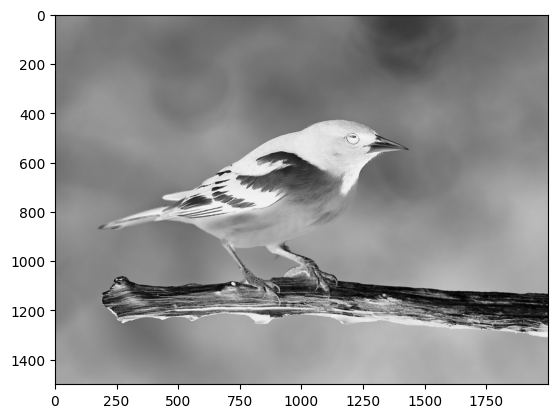

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale imagehhh
img = Image.open('bird.png').convert('L')

#convert image i into an ndarray
im_1 = np.asarray(img)

#inversion operation
im_2 = 255 - im_1
print (im_2)

#convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img, cmap = "gray")
plt.show()


1.2 Thay đổi chất lượng với Power law (Gamma - Correction)

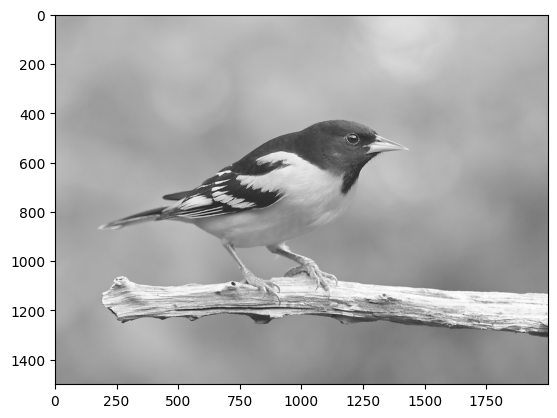

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
# Mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# Đảo ảnh dạng "L" sang 1 mảng số
im_1 = np.asarray(img)
# Gamma ban đầu
gamma = 0.5
# Chuyển matrix từ số nguyên sang số thực
b1 = im_1.astype(float)
# Tìm giá trị lớn nhất trong B1
b2 = np.max(b1)
# Chuẩn hóa B1 (tức là chuyển các giá trị b1 về khoảng [0,1])
b3 = (b1+1) / b2
# Tính tương quan hàm mũ gamma (logarit nhân gamma)
b4 = np.log(b3) * gamma
# Tính tương quan hàm mũ gamma và quy về khoảng [0,255]
c = np.exp(b4) * 255.0
# Chuyển c về số nguyên
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)
img.show()
plt.imshow(d, cmap='gray')
plt.show()

1.3 Thay đổi cường độ điểm ảnh với Log Transformation

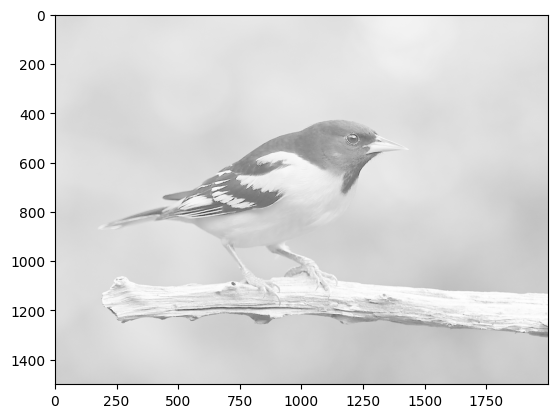

In [11]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# Đảo ảnh dạng "L" sang 1 mảng số
im_1 = np.asarray(img)

# Chuyển matrix từ số nguyên sang số thực
b1 = im_1.astype(float)
# Tìm giá trị lớn nhất trong B1
b2 = np.max(b1)
# Biến đổi log
c = (128.0*np.log(1+b1))/np.log(1+b2)
# Chuyển c về số nguyên
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)
img.show()
plt.imshow(d, cmap='gray')
plt.show()

1.4 Histogram equalization 

<function matplotlib.pyplot.show(close=None, block=None)>

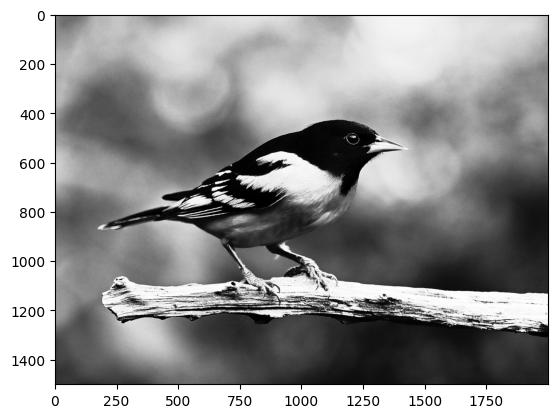

In [13]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
img = Image.open('bird.png').convert('L')
im1 = np.array(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
plt.imshow(im4, cmap = 'gray')
plt.show

1.5 Thay đổi với Contrast Stretching

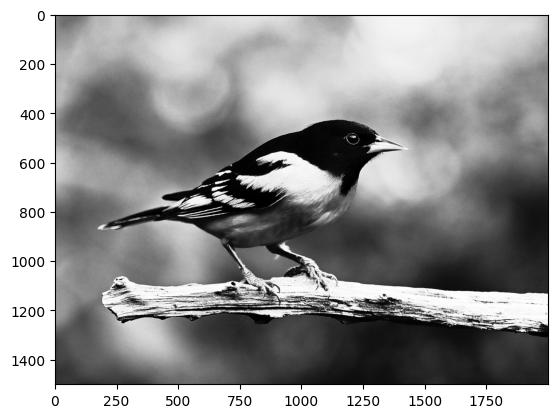

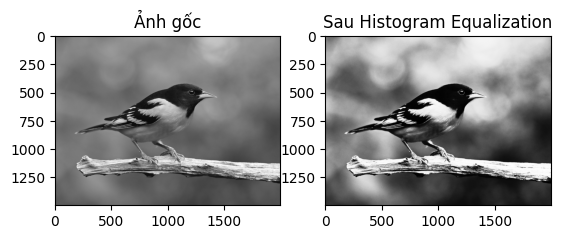

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh mức xám
img = Image.open('bird.png').convert('L')

# Chuyển ảnh sang mảng numpy
im1 = np.array(img)

# Làm phẳng mảng (1 chiều hóa)
b1 = im1.flatten()

# Tính histogram với 256 mức xám
hist, bins = np.histogram(im1, 256, [0, 255])

# Tính hàm phân phối tích lũy (CDF)
cdf = hist.cumsum()

# Bỏ qua các phần tử bằng 0 để tránh chia cho 0
cdf_m = np.ma.masked_equal(cdf, 0)

# Áp dụng công thức chuẩn hóa CDF để đưa về 0–255
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf.min())
cdf_m = num_cdf_m / den_cdf_m

# Gán lại giá trị CDF đã chuẩn hóa
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Tra bảng tra CDF để ánh xạ giá trị pixel mới
im2 = cdf[b1]

# Đưa ảnh trở lại định dạng 2D gốc
im3 = np.reshape(im2, im1.shape)

# Tạo ảnh mới từ mảng đã xử lý
im4 = Image.fromarray(im3)

# Hiển thị ảnh sau Histogram Equalization
plt.imshow(im4, cmap='gray')
plt.show()

# So sánh thử 

plt.subplot(1, 2, 1)
plt.title("Ảnh gốc")
plt.imshow(im1, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Sau Histogram Equalization")
plt.imshow(im3, cmap='gray')


1.6.1 Biến đổi ảnh với Fast Fourier

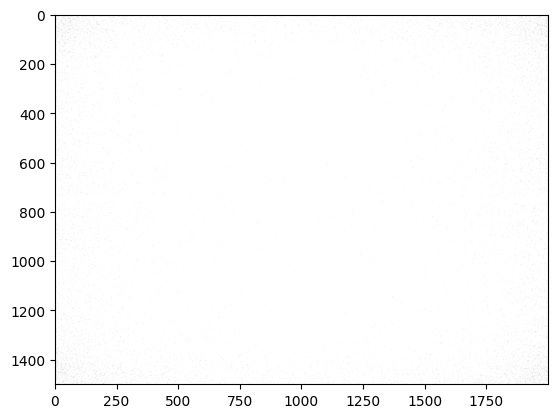

In [17]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.2 Lọc ảnh miền tần suất 

Butterworth Lowpass Filter

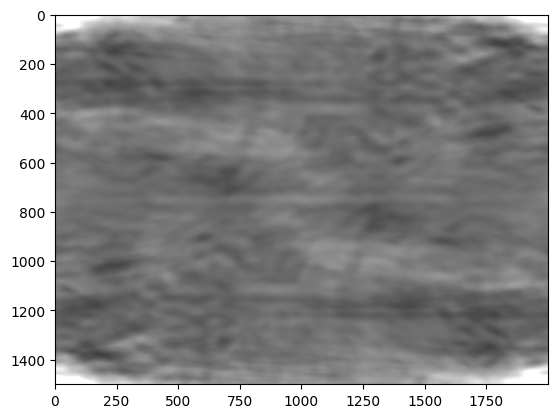

In [23]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image i into an ndarray
im1 = np.asarray(img)

#performing FFT
c = abs(scipy.fftpack.fft2(im1))

#shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
H = np.ones((M,N))

center1 = M/2
center2 = N/2
d_0 = 30.0  # cut-off radius
t1 = 1     # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1
#defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = ((i - center1)**2 + (j - center2)**2)
        r = math.sqrt(r1)
        #using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i,j] = 1 / (1 + (r/d_0)**(2*t1))

#H is converted from ndarray to image
H = H.astype(float)
h = Image.fromarray(H)

#performing the convolution
con = d * H

#computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()



Butterworth Highpass Filter

C:\Users\X270\AppData\Local\Temp\ipykernel_9300\2937638357.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  e = e.astype(float)


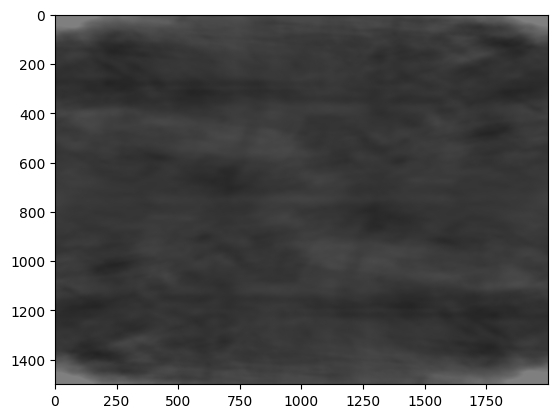

In [19]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image i into an ndarray
im1 = np.asarray(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

#initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]

#H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d0 = 30.0  # cut-off radius
t1 = 1     # the order of BLPF (Butterworth Lowpass Filter)

# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)           # euclidean distance from origin is computed
        if r > 0:                   # using cut-off radius to eliminate high frequency
            H[i,j] = 1 / (1 + (r/d0)**(2*t1))

#H is converted from ndarray to image
H = H.astype(float)
h = Image.fromarray(H)

# performing the convolution
com = d * H

# computing the magnitude of the inverse FFT
e = scipy.fftpack.ifft2(com)

#e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
h.show()
plt.imshow(im3)
plt.show()


2.BÀI TẬP


1. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:

Image inverse transformation

Gamma-Correction

Log Transformation

Histogram equalization

Contrast Stretching

Khi người dùng ấn phím I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.



Chọn phương pháp biến đổi:
I - Image Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching


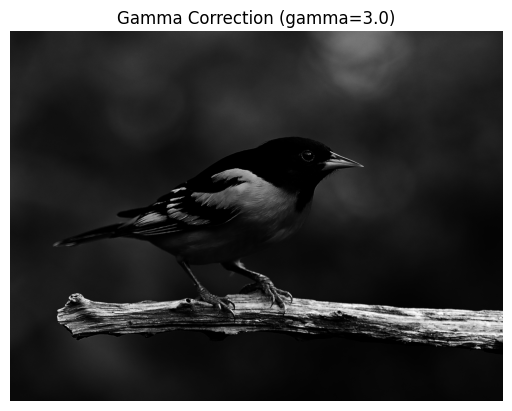

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, image_array):
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Hàm 1: Image inverse
def image_inverse(im):
    return 255 - im

# Hàm 2: Gamma correction
def gamma_correction(im, gamma=0.5):
    norm = im / 255.0
    corrected = np.power(norm, gamma)
    return np.uint8(corrected * 255)

# Hàm 3: Log transformation
def log_transform(im):
    im = im.astype(float)
    c = 255 / np.log(1 + np.max(im))
    log_image = c * np.log(1 + im)
    return np.uint8(log_image)

# Hàm 4: Histogram equalization
def histogram_equalization(im):
    flat = im.flatten()
    hist, bins = np.histogram(im, 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized = cdf[flat]
    return np.reshape(equalized, im.shape)

# Hàm 5: Contrast stretching
def contrast_stretch(im):
    a, b = np.min(im), np.max(im)
    stretched = 255 * (im - a) / (b - a)
    return np.uint8(stretched)

# Mở ảnh grayscale
img = Image.open('bird.png').convert('L')
im_array = np.array(img)

# Menu
print("Chọn phương pháp biến đổi:")
print("I - Image Inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")

choice = input("Nhập lựa chọn của bạn (I/G/L/H/C): ").upper()

if choice == 'I':
    result = image_inverse(im_array)
    show_image("Image Inverse", result)

elif choice == 'G':
    gamma = float(input("Nhập giá trị gamma (ví dụ: 0.5 hoặc 5): "))
    result = gamma_correction(im_array, gamma)
    show_image(f"Gamma Correction (gamma={gamma})", result)

elif choice == 'L':
    result = log_transform(im_array)
    show_image("Log Transformation", result)

elif choice == 'H':
    result = histogram_equalization(im_array)
    show_image("Histogram Equalization", result)

elif choice == 'C':
    result = contrast_stretch(im_array)
    show_image("Contrast Stretching", result)

else:
    print("Lựa chọn không hợp lệ!")

2. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:

Fast Fourier

Butterworth Lowpass Filter

Butterworth Highpass Filter

Khi người dùng ấn phím F, L, H thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.



F: Fast Fourier
L: Butterworth Lowpass
H: Butterworth Highpass


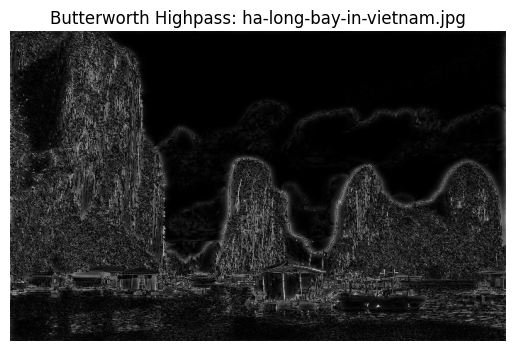

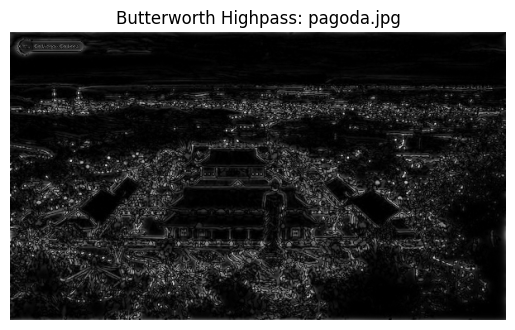

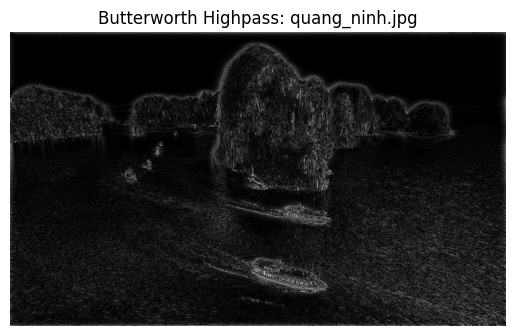

In [10]:
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
import os
import math

def Fast_Fourier(img):
    fft_result = abs(scipy.fftpack.fft2(img))
    shifted = scipy.fftpack.fftshift(fft_result)
    return shifted

def Butterworth_Lowpass(img, r0=30.0, t=1):
    M, N = img.shape
    H = np.ones((M, N))
    center1, center2 = M / 2, N / 2
    for i in range(M):
        for j in range(N):
            r = math.sqrt((i - center1) ** 2 + (j - center2) ** 2)
            if r > 0:
                H[i, j] = 1 / (1 + (r / r0) ** (2 * t))
    return apply_filter(img, H)

def Butterworth_Highpass(img, r0=30.0, t=1):
    M, N = img.shape
    H = np.zeros((M, N))
    center1, center2 = M / 2, N / 2
    for i in range(M):
        for j in range(N):
            r = math.sqrt((i - center1) ** 2 + (j - center2) ** 2)
            if r > 0:
                H[i, j] = 1 / (1 + (r0 / r) ** (2 * t))
    return apply_filter(img, H)

def apply_filter(img, H):
    fft = scipy.fftpack.fft2(img)
    fft_shift = scipy.fftpack.fftshift(fft)
    filtered = fft_shift * H
    inverse_fft = abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(filtered)))
    return inverse_fft

def apply_transformation(func, input_folder, output_folder, method_name):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images_found = False
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            images_found = True
            path = os.path.join(input_folder, filename)
            img = Image.open(path).convert('L')
            img_array = np.array(img)
            result = func(img_array)
            result_img = Image.fromarray(np.clip(result, 0, 255).astype(np.uint8))
            save_path = os.path.join(output_folder, f"{method_name.replace(' ', '_')}_{filename}")
            result_img.save(save_path)
            plt.imshow(result, cmap='gray')
            plt.title(f"{method_name}: {filename}")
            plt.axis('off')
            plt.show()

    if not images_found:
        print(f"Không tìm thấy ảnh trong thư mục '{input_folder}'.")

# Menu lựa chọn
transform_map = {
    'F': (Fast_Fourier, 'Fast Fourier'),
    'L': (Butterworth_Lowpass, 'Butterworth Lowpass'),
    'H': (Butterworth_Highpass, 'Butterworth Highpass'),
}

print("F: Fast Fourier")
print("L: Butterworth Lowpass")
print("H: Butterworth Highpass")

choice = input("Nhập lựa chọn (F, L, H): ").strip().upper()

if choice in transform_map:
    func, name = transform_map[choice]
    apply_transformation(func, "exercise", "result", name)
else:
    print("Lựa chọn không hợp lệ.")



3. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi.

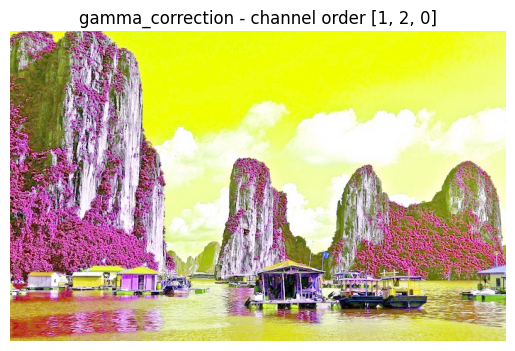

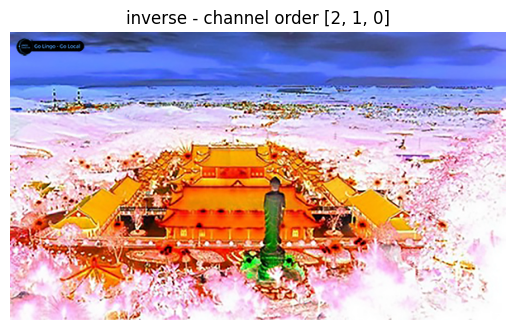

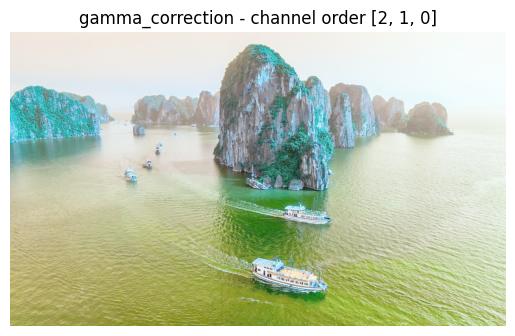

In [ ]:
import os
import numpy as np
from PIL import Image, ImageOps
import random
import matplotlib.pyplot as plt

# Thư mục chứa ảnh và thư mục lưu ảnh kết quả
input_dir = 'exercise'
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Các hàm biến đổi ảnh
def inverse(img_array):
    return 255 - img_array

def gamma_correction(img_array, gamma=2.2):
    normalized = img_array / 255.0
    corrected = np.power(normalized, 1/gamma)
    return (corrected * 255).astype(np.uint8)

def log_transform(img_array):
    img_array = img_array.astype(np.float32)
    result = np.log1p(img_array)
    result = result / result.max() * 255
    return result.astype(np.uint8)

def hist_eq(img_array):
    # Chỉ áp dụng lên ảnh xám hoặc kênh sáng
    if img_array.ndim == 3:
        img_gray = np.mean(img_array, axis=2).astype(np.uint8)
    else:
        img_gray = img_array
    hist, bins = np.histogram(img_gray.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf = cdf.astype(np.uint8)
    result = cdf[img_gray]
    return np.stack([result]*3, axis=-1) if img_array.ndim == 3 else result

def contrast_stretch(img_array):
    min_val = img_array.min()
    max_val = img_array.max()
    stretched = (img_array - min_val) * 255 / (max_val - min_val)
    return stretched.astype(np.uint8)

transforms = [inverse, gamma_correction, log_transform, hist_eq, contrast_stretch]

for file in os.listdir(input_dir):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        path = os.path.join(input_dir, file)
        img = Image.open(path).convert('RGB')
        img_array = np.array(img)

        # Đổi thứ tự RGB ngẫu nhiên
        order = random.sample([0, 1, 2], 3)
        img_array = img_array[:, :, order]

        # Áp dụng phép biến đổi ngẫu nhiên
        transform = random.choice(transforms)
        transformed_array = transform(img_array)

        # Lưu kết quả
        result_img = Image.fromarray(transformed_array)
        save_path = os.path.join(output_dir, 'processed_' + file)
        result_img.save(save_path)

        # Hiển thị ảnh
        plt.imshow(result_img)
        plt.title(f"{transform.__name__} - channel order {order}")
        plt.axis('off')
        plt.show()


4. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 2. Nếu ngẫu nhiên là phép Butterworth Lowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass thì chọn thêm Max Filter để lọc ảnh. Lưu và hiển thị ảnh đã biến đổi.



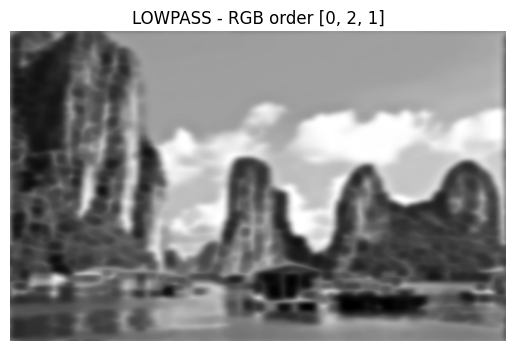

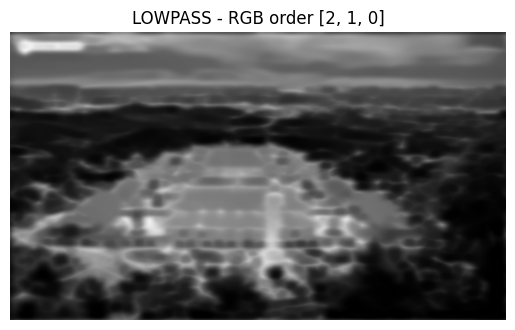

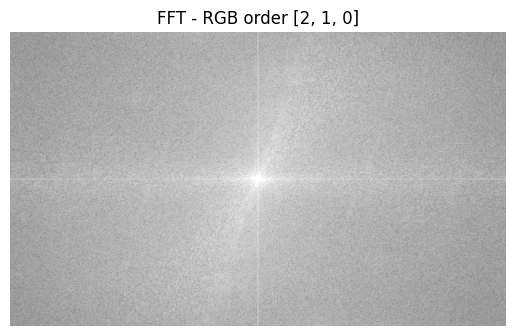

In [2]:
import os
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import random
from scipy.fft import fft2, ifft2, fftshift, ifftshift

def to_gray(img_array):
    return np.mean(img_array, axis=2).astype(np.uint8)

def fft_transform(img_array):
    gray = to_gray(img_array)
    f = fft2(gray)
    fshift = fftshift(f)
    magnitude = 20 * np.log(np.abs(fshift) + 1)
    magnitude = np.clip(magnitude, 0, 255)
    return np.stack([magnitude]*3, axis=-1).astype(np.uint8)

def butterworth_lowpass(img_array, d0=30, n=2):
    gray = to_gray(img_array)
    f = fft2(gray)
    fshift = fftshift(f)

    M, N = gray.shape
    u = np.arange(M)
    v = np.arange(N)
    u, v = np.meshgrid(u - M//2, v - N//2, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D / d0)**(2 * n))

    G = H * fshift
    result = np.abs(ifft2(ifftshift(G)))
    result = np.clip(result, 0, 255).astype(np.uint8)
    return np.stack([result]*3, axis=-1)

def butterworth_highpass(img_array, d0=30, n=2):
    gray = to_gray(img_array)
    f = fft2(gray)
    fshift = fftshift(f)

    M, N = gray.shape
    u = np.arange(M)
    v = np.arange(N)
    u, v = np.meshgrid(u - M//2, v - N//2, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n)) 

    G = H * fshift
    result = np.abs(ifft2(ifftshift(G)))
    result = np.clip(result, 0, 255).astype(np.uint8)
    return np.stack([result]*3, axis=-1)

input_dir = 'exercise'
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(input_dir):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        path = os.path.join(input_dir, file)
        img = Image.open(path).convert('RGB')
        img_array = np.array(img)

        # Đổi thứ tự kênh màu ngẫu nhiên
        order = random.sample([0, 1, 2], 3)
        img_array = img_array[:, :, order]

        # Chọn 1 phép biến đổi ngẫu nhiên trong câu 2
        method = random.choice(['fft', 'lowpass', 'highpass'])

        if method == 'fft':
            transformed = fft_transform(img_array)
        elif method == 'lowpass':
            transformed = butterworth_lowpass(img_array)
            transformed = Image.fromarray(transformed).filter(ImageFilter.MinFilter(3))
            transformed = np.array(transformed)
        elif method == 'highpass':
            transformed = butterworth_highpass(img_array)
            transformed = Image.fromarray(transformed).filter(ImageFilter.MaxFilter(3))
            transformed = np.array(transformed)

        # Lưu và hiển thị kết quả
        result_img = Image.fromarray(transformed)
        save_path = os.path.join(output_dir, f"{method}_{file}")
        result_img.save(save_path)

        plt.imshow(result_img)
        plt.title(f"{method.upper()} - RGB order {order}")
        plt.axis('off')
        plt.show()
